In [264]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [265]:
def plot_rectangle(image, labels, label=None, color='k', facecolor='None', iouScore=None):
    x1, y1 = labels[0], labels[1]
    x2, y2 = labels[2], labels[3]
    w, h = x2-x1, y2-y1
    plt.imshow(image)
    alpha = 0.3 if facecolor != 'None' else 1
    # x1,y1, w, h
    plt.gca().add_patch(Rectangle((x1,y1),w,h,linewidth=1, edgecolor=color, facecolor=facecolor , alpha=alpha))
    plt.text(x1+(w/3), y1-3, s=label, fontsize=14, color=color)
    if iouScore :
        plt.text(x1+(w/3),y1+(h/2),f'{iouScore*100:.2f}%', fontsize=16)
    plt.axis('off');

In [266]:
image_path = './cat.jpg'
image = Image.open(image_path)
true_label = [130,20,340,250]
predict_label = [110, 40, 300, 230]

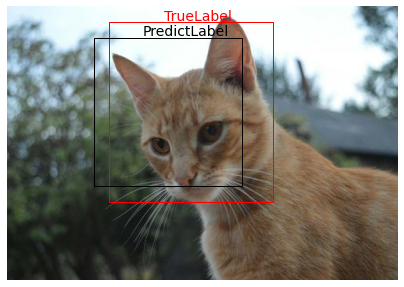

In [267]:
plt.figure(figsize=(7,7))
plot_rectangle(image, true_label,'TrueLabel','r')
plot_rectangle(image, predict_label, 'PredictLabel','k')

### Want to get a score from prediction --> Intersection over Union (IoU)

In [268]:
# Intersect area / Union area
def IoU(boxes_true, boxes_pred) :
    assert type(boxes_true) == type(boxes_pred)
    # [x1,y1,x2,y] 2 top left corner and bottom right corner points
    
    b1_x1 = boxes_pred[0]
    b1_y1 = boxes_pred[1]
    b1_x2 = boxes_pred[2]
    b1_y2 = boxes_pred[3]

    b2_x1 = boxes_true[0]
    b2_y1 = boxes_true[1]
    b2_x2 = boxes_true[2]
    b2_y2 = boxes_true[3]

    x1 = max(b1_x1, b2_x1)
    y1 = max(b1_y1, b2_y1)
    x2 = min(b1_x2, b2_x2)
    y2 = min(b1_y2, b2_y2)

    intersectArea = abs(x2-x1) * abs(y2-y1) # if x1-x2 < 0
    b1Area = abs(b1_x2-b1_x1) * abs(b1_y2-b1_y1)
    b2Area = abs(b2_x2-b2_x1) * abs(b2_y2-b2_y1)
    iou = intersectArea / (b1Area + b2Area - intersectArea)
    return iou, [x1, y1, x2, y2]

In [269]:
iouScore, intersectPoint = IoU(true_label, predict_label)
iouScore, intersectPoint

(0.6199616122840691, [130, 40, 300, 230])

In [270]:
true_label, predict_label

([130, 20, 340, 250], [110, 40, 300, 230])

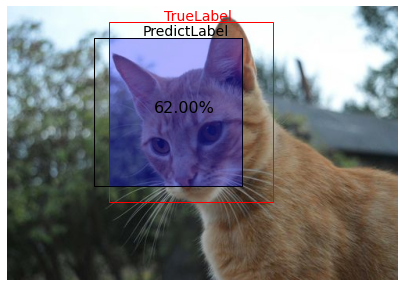

In [271]:
plt.figure(figsize=(7,7))
plot_rectangle(image, true_label,'TrueLabel','r' )
plot_rectangle(image, predict_label, 'PredictLabel','k')
plot_rectangle(image, intersectPoint, facecolor='b', iouScore=iouScore)

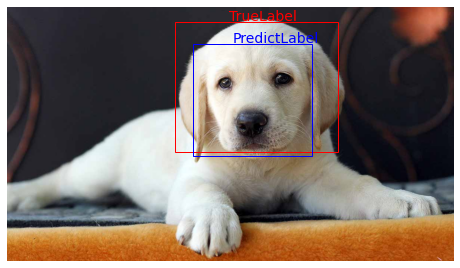

In [275]:
image_path = './dog.jpg'
image = Image.open(image_path)
plt.figure(figsize=(8,8))
true_label = [450,40,890,390]
predict_label = [500, 100, 820, 400]
plot_rectangle(image, true_label, label='TrueLabel', color='r')
plot_rectangle(image, predict_label, label='PredictLabel', color='b')

In [280]:
iouScore, intersectPoint = IoU(true_label, predict_label)
iouScore, intersectPoint

(0.5903307888040712, [500, 100, 820, 390])

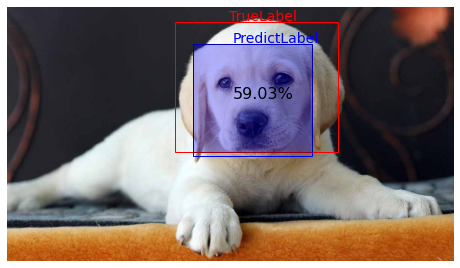

In [281]:
plt.figure(figsize=(8,8))
plot_rectangle(image, true_label, label='TrueLabel', color='r')
plot_rectangle(image, predict_label, label='PredictLabel', color='b')
plot_rectangle(image, intersectPoint, facecolor='b', iouScore=iouScore)